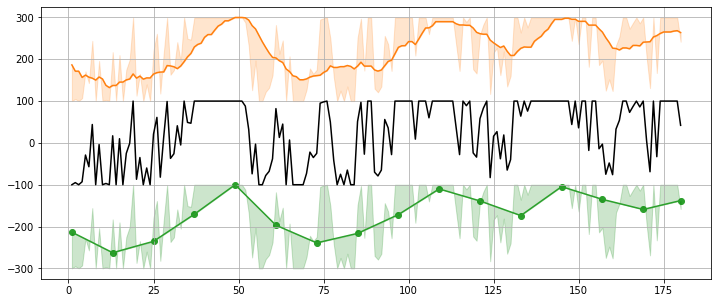

In [1]:
# This notebook shows two different graph smooting methods: by last n values
# every step, and last n values every n steps. Resulting plot show graphs,
# separated by y axis for readiness

import matplotlib.pyplot as plt
import numpy as np
from random import randint


def averager(data: list,
             average_range: int = None,
             is_every_step: bool = True):
    d = data
    dia = average_range
    if bool(is_every_step) is True:
        # Aggregate last average_range values, starting from current position
        # and return result for every step
        return [np.mean(d[max(0, i-dia):i+1]) for i in range(len(d))]
    else:
        # or return result every average_range step of list
        return [np.mean(d[max(0, i-dia):i+1])
                    for i in range(0, len(d)+dia,dia)]


# Units for X-axis - seconds
SEC, MINUTE, HOUR = 1, 60, 3600
STEP = 1
AVG_RANGE = 12
RAND_RANGE = 100

data_x = np.arange(1, 3*MINUTE+STEP, STEP)

# Additional AVG_RANGE values for filling averager function
data_y = np.array([randint(-RAND_RANGE, RAND_RANGE)
                   for _ in range(len(data_x) + AVG_RANGE)])

# Modify source data and limit it
data_y += np.array(averager(data_y, 15), dtype=np.int32) * 8
data_y = np.maximum(-RAND_RANGE, np.minimum(RAND_RANGE, data_y))

# Averagers
data_y_avg_step = np.array(averager(data_y, AVG_RANGE))

# data_y_avg_dia = np.array(averager(data_y[AVG_RANGE:], AVG_RANGE, 0))
data_y_avg_dia = np.array(averager(data_y, AVG_RANGE, 0))
data_x_avg_dia = np.array([data_x[min(len(data_x)-1, i)]
                           for i in range(0, len(data_x)+AVG_RANGE,
                                          AVG_RANGE)])
data_y_avg_dia_ip = np.interp(data_x, data_x_avg_dia, data_y_avg_dia[1:])

# Truncating extra values
data_y = data_y[AVG_RANGE:]
data_y_avg_dia = data_y_avg_dia[1:]
data_y_avg_step = data_y_avg_step[AVG_RANGE:]


# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

# Offsetting data (visual split for readiness)
data_y_avg_step += RAND_RANGE * 2
data_y_avg_dia_ip -= RAND_RANGE * 2

ax.plot(data_x, data_y, 'k')  # source data

# Every step method
ax.plot(data_x, data_y_avg_step, 'tab:orange')
ax.fill_between(data_x,
                data_y + (RAND_RANGE * 2),  # offset filled zone to its
                data_y_avg_step,  # corresponding graph
                where=np.array([True for _ in range(len(data_x))]),
                color='tab:orange', alpha=0.2, interpolate=True)
# Every n steps method
ax.plot(data_x, data_y_avg_dia_ip, 'tab:green')
ax.scatter(data_x_avg_dia, data_y_avg_dia - (RAND_RANGE * 2),
           color='tab:green')
ax.fill_between(data_x,
                data_y - (RAND_RANGE * 2),
                data_y_avg_dia_ip,
                where=np.array([True for _ in data_x]),
                color='g', alpha=0.2, interpolate=True)

ax.set_ylim(-RAND_RANGE * 3.25, RAND_RANGE * 3.25)
ax.grid()